### import packages and modules

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import pylab
pylab.rcParams["figure.figsize"] = (5.0, 4.0)
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from sklearn import preprocessing
from numpy import where
import functools
from functools import reduce
import operator
import seaborn as sns

## Section1 Data 2008-2019

### Data Preprocessing: Data (2008-2019)

In [2]:
path='MACS30200_data.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,Year,Province,GDP,CPI,Population,Graduations_College,Graduations_University,Total_retail_sales,First_industry,Second_industry,Third_industry,Natural_Population_growth_rate,unemployment_rate
0,2008,Shanghai,14536.9,105.78257,2140.643464,5.6190,7.6945,4577.2,109.4,6215.5,8212.1,2.72,4.20
1,2008,Yunnan,6016.6,105.69938,4543.000000,4.3474,4.4059,1764.7,1001.9,2476.1,2538.6,6.32,4.21
2,2008,Neimenggu,6242.4,105.74208,2444.330000,4.6597,3.2567,2463.0,902.9,2555.1,2784.4,4.27,4.10
3,2008,Beijing,11813.1,105.06181,1771.000000,4.3856,11.6409,4645.5,111.4,2526.7,9175.1,3.42,1.82
4,2008,Jilin,4834.7,105.11340,2734.210000,3.9125,8.9515,2549.2,863.6,1788.0,2183.2,1.61,3.98


In [4]:
df.isna().sum()

Year                              0
Province                          0
GDP                               0
CPI                               0
Population                        0
Graduations_College               0
Graduations_University            0
Total_retail_sales                0
First_industry                    0
Second_industry                   0
Third_industry                    0
Natural_Population_growth_rate    0
unemployment_rate                 0
dtype: int64

#### Feature selection

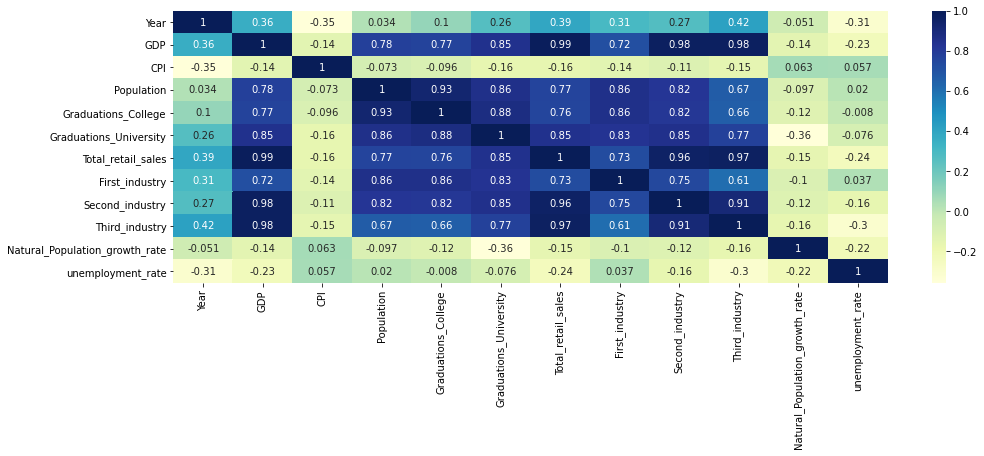

In [5]:
plt.figure(figsize = (16,5))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [6]:
df_select = df[[ "GDP", "CPI", "unemployment_rate", "Population", "Graduations_College", "Graduations_University", "First_industry"]]

In [7]:
df_selecty = df[[ "unemployment_rate"]]

In [8]:
df_selectx = df[["GDP", "CPI", "Population", "Graduations_College", "Graduations_University", "First_industry"]]
df_selectx

,GDP,CPI,Population,Graduations_College,Graduations_University,First_industry
0,14536.90,105.78257,2140.643464,5.6190,7.6945,109.40
1,6016.60,105.69938,4543.000000,4.3474,4.4059,1001.90
2,6242.40,105.74208,2444.330000,4.6597,3.2567,902.90
3,11813.10,105.06181,1771.000000,4.3856,11.6409,111.40
4,4834.70,105.11340,2734.210000,3.9125,8.9515,863.60
...,...,...,...,...,...,...
367,24855.26,102.40000,4277.000000,8.8580,17.5373,2177.97
368,23605.77,102.70000,3188.000000,10.1469,11.6503,1551.59
369,25793.17,102.90000,3944.000000,12.7426,17.2024,1991.11
370,2941.07,102.50000,590.000000,1.0351,0.9662,301.90


#### data scaling

In [9]:
scaler = preprocessing.StandardScaler().fit(df_selectx)

In [10]:
df_scaledx = scaler.transform(df_selectx)
df_scaledx

array([[-0.31149242,  1.7198801 , -0.80021335, -0.68041739, -0.50960365,
        -1.25856826],
       [-0.77480389,  1.67384848,  0.04787044, -0.84173798, -0.97657369,
        -0.53932741],
       [-0.76252548,  1.69747572, -0.69300544, -0.80211827, -1.13975619,
        -0.61910875],
       ...,
       [ 0.30059389,  0.12486416, -0.16358951,  0.22331285,  0.8404859 ,
         0.25784933],
       [-0.94204311, -0.09646832, -1.34762402, -1.26195046, -1.46499942,
        -1.10343788],
       [-0.36546032,  0.06953104, -0.4068214 , -0.55696578,  0.23245642,
         1.2185214 ]])

In [11]:
df_selectx["GDP"] = df_scaledx[:,0]
df_selectx["CPI"] = df_scaledx[:,1]
df_selectx["Population"] = df_scaledx[:,2]
df_selectx["Graduations_College"] = df_scaledx[:,3]
df_selectx["Graduations_University"] = df_scaledx[:,4]
df_selectx["First_industry"] = df_scaledx[:,5]


<ipython-input-11-cf136ecdeb38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selectx["GDP"] = df_scaledx[:,0]
<ipython-input-11-cf136ecdeb38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selectx["CPI"] = df_scaledx[:,1]
<ipython-input-11-cf136ecdeb38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [12]:
df_selectx

,GDP,CPI,Population,Graduations_College,Graduations_University,First_industry
0,-0.311492,1.719880,-0.800213,-0.680417,-0.509604,-1.258568
1,-0.774804,1.673848,0.047870,-0.841738,-0.976574,-0.539327
2,-0.762525,1.697476,-0.693005,-0.802118,-1.139756,-0.619109
3,-0.459605,1.321061,-0.930705,-0.836892,0.050772,-1.256957
4,-0.839072,1.349607,-0.590672,-0.896911,-0.331114,-0.650780
...,...,...,...,...,...,...
367,0.249593,-0.151801,-0.046033,-0.269504,0.888041,0.408435
368,0.181649,0.014198,-0.430474,-0.105989,0.052107,-0.096348
369,0.300594,0.124864,-0.163590,0.223313,0.840486,0.257849
370,-0.942043,-0.096468,-1.347624,-1.261950,-1.464999,-1.103438


### Run Regression: Train and test with data (2008-2019)

In [13]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(df_selectx, df_selecty, test_size = 0.2, random_state = 42)

In [14]:
Linear_reg = LinearRegression()
model = Linear_reg.fit(X_train_reg, y_train_reg)

print(Linear_reg.score(X_train_reg, y_train_reg))
print(Linear_reg.score(X_test_reg, y_test_reg))


0.1578508936173859
0.16252260713918965


In [15]:
coef_order = model.coef_[0].argsort()[::-1] #get the order of indices of reg.coef_
x, y = [], []
for i in zip(model.coef_[0][coef_order], model.feature_names_in_[coef_order]):
    y.append(i[0])
    x.append(i[1])
    print('{:.3f}'.format(i[0]), i[1])

0.259 Population
0.151 First_industry
0.073 Graduations_University
0.012 CPI
-0.078 Graduations_College
-0.452 GDP


In [16]:
import matplotlib

Text(0.5, 1.0, 'Feature importance of unemployment rate from 2008-2019')

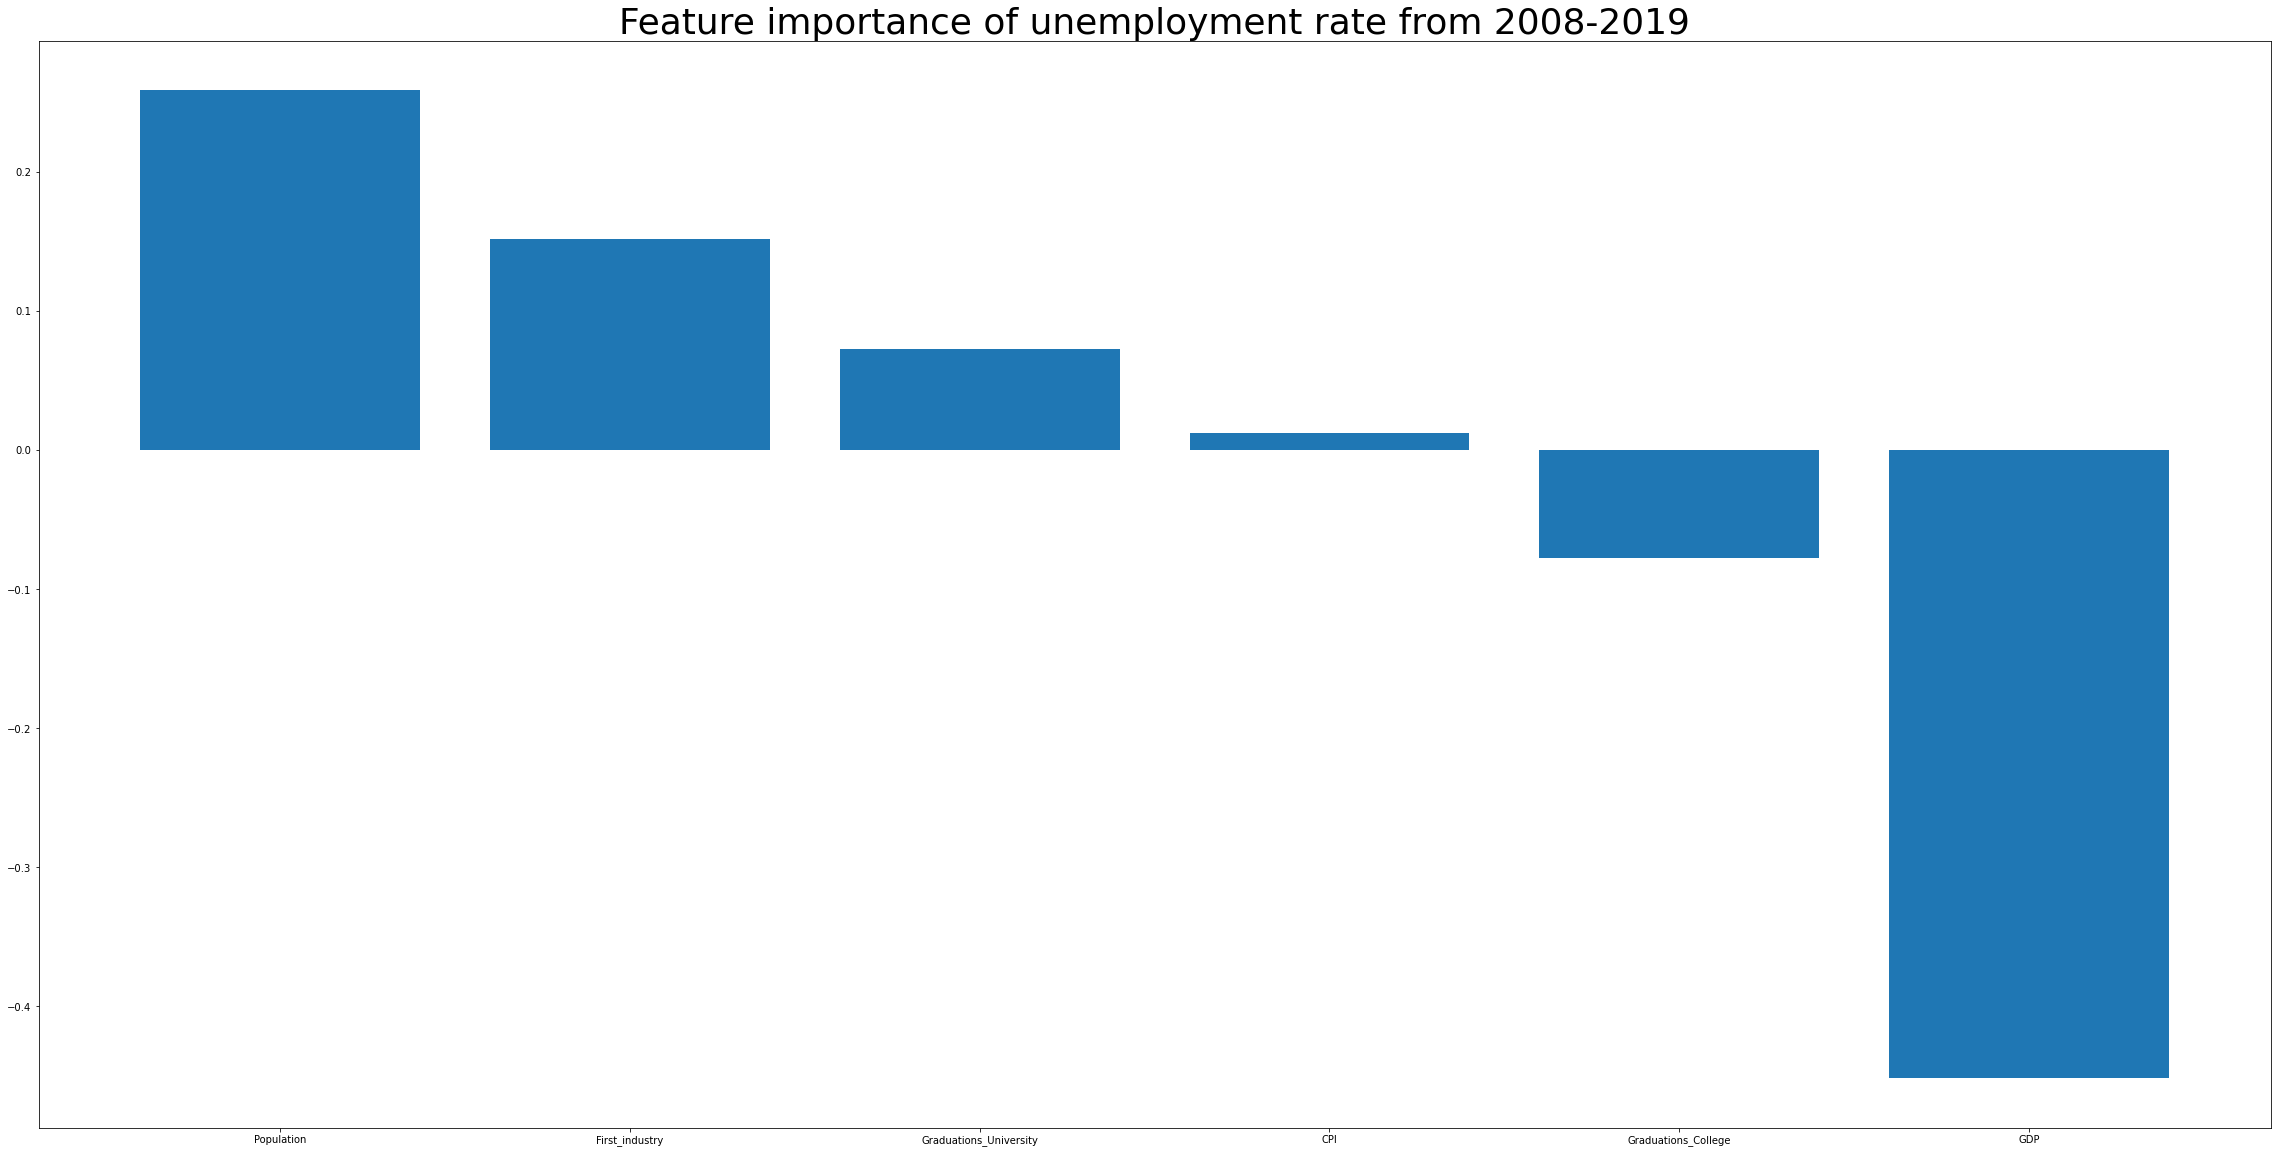

In [17]:
plt.figure(figsize = (40,20))
plt.bar(x, y)
matplotlib.rcParams.update({'font.size': 30})
plt.title("Feature importance of unemployment rate from 2008-2019")

## Section2 Data 2020 without Covid

### Data Preprocessing: Data 2020

In [18]:
path2020='2020data_nocovid.csv'
df_2020 = pd.read_csv(path2020)

In [19]:
df_2020

,Province,GDP,CPI,Population,Graduations_College,Graduations_University,First_industry,unemployment_rate,predicted,gap_value
0,Shanghai,38963.30,101.7,2488.223752,4.6321,10.2253,107.68,3.67,3.927,-0.257
1,Yunnan,24555.72,103.6,4722.224382,13.5539,13.0349,3611.76,3.92,3.205,0.715
2,Neimenggu,17258.04,101.9,2402.800479,6.7816,6.8243,2028.82,3.80,3.475,0.325
3,Beijing,35943.25,101.7,2189.000000,2.7969,13.0796,108.28,2.56,1.402,1.158
4,Jilin,12255.98,102.3,2399.229814,6.3259,12.4354,1553.04,3.42,3.315,0.105
5,Sichuan,48501.64,103.2,8370.698567,23.6548,23.9261,5556.86,3.63,3.772,-0.142
6,Tianjin,14007.99,102.0,1386.841080,6.0558,8.9243,210.34,3.62,3.508,0.112
7,Ningxia,3956.34,101.5,720.931970,1.4667,2.0845,338.08,3.92,3.772,0.148
8,Anhui,38061.51,102.7,6104.761696,16.2286,17.1295,3184.95,2.83,2.616,0.214
9,Shandong,72798.17,102.8,10164.510620,34.5711,28.6303,5364.35,3.10,3.373,-0.273


#### Data scaling

In [20]:
df_select2020 = df_2020[["GDP", "CPI", "Population", "Graduations_College", "Graduations_University", "First_industry"]]

In [21]:
scaler_2020 = preprocessing.StandardScaler().fit(df_select2020)

In [22]:
df_scaled2020 = scaler.transform(df_select2020)
#df_scaled2020

In [23]:
df_select2020["GDP"] = df_scaled2020[:,0]
df_select2020["CPI"] = df_scaled2020[:,1]
df_select2020["Population"] = df_scaled2020[:,2]
df_select2020["Graduations_College"] = df_scaled2020[:,3]
df_select2020["First_industry"] = df_scaled2020[:,5]
df_select2020

<ipython-input-23-19920ce08fdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select2020["GDP"] = df_scaled2020[:,0]
<ipython-input-23-19920ce08fdf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select2020["CPI"] = df_scaled2020[:,1]
<ipython-input-23-19920ce08fdf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

,GDP,CPI,Population,Graduations_College,Graduations_University,First_industry
0,1.016751,-0.539133,-0.677510,-0.805620,10.2253,-1.259954
1,0.233305,0.512196,0.111141,0.326238,13.0349,1.563886
2,-0.163524,-0.428467,-0.707666,-0.532925,6.8243,0.288239
3,0.852528,-0.539133,-0.783142,-1.038441,13.0796,-1.259471
4,-0.435523,-0.207135,-0.708927,-0.590737,12.4354,-0.095179
5,1.535421,0.290864,1.399131,1.607681,23.9261,3.131388
6,-0.340253,-0.373134,-1.066322,-0.625003,8.9243,-1.177224
7,-0.886835,-0.649800,-1.301402,-1.207196,2.0845,-1.074281
8,0.967714,0.014198,0.599206,0.665562,17.1295,1.219932
9,2.856602,0.069531,2.032385,2.992569,28.6303,2.976249


### Run Regression: Data 2020 without covid

In [24]:
predict = model.predict(df_select2020)
#predict

In [25]:
df_employ =  df_2020[["Province", "unemployment_rate"]]
df_employ

,Province,unemployment_rate
0,Shanghai,3.67
1,Yunnan,3.92
2,Neimenggu,3.80
3,Beijing,2.56
4,Jilin,3.42
5,Sichuan,3.63
6,Tianjin,3.62
7,Ningxia,3.92
8,Anhui,2.83
9,Shandong,3.10


In [26]:
keys = df_employ['Province'].values.tolist()
#keys

In [27]:
employ_num = df_employ.values[:,1:]
#employ_num

In [28]:
gap = employ_num - predict
#gap

In [29]:
gap_values = gap.tolist()
#gap_values

In [30]:
gap_List_flat = functools.reduce(operator.iconcat, gap_values, [])
#gap_List_flat

In [31]:
dictionary = dict(zip(keys, gap_List_flat))
#print(dictionary)

In [32]:
df_gap = pd.DataFrame(dictionary.items(), columns=['Province', 'gap_value'])
df_gap

,Province,gap_value
0,Shanghai,0.371442
1,Yunnan,-0.493664
2,Neimenggu,0.008819
3,Beijing,-1.011339
4,Jilin,-0.851248
5,Sichuan,-1.456136
6,Tianjin,-0.096973
7,Ningxia,0.457216
8,Anhui,-1.591420
9,Shandong,-1.761444


In [33]:
df_gap.to_csv('gap.csv')

In [34]:
x = df_select2020["Province"]
y = df_select2020["gap_value"]

KeyError: 'Province'

Text(0.5, 1.0, 'gap between predicted umemployment rate and true unemployment rate in 2020')

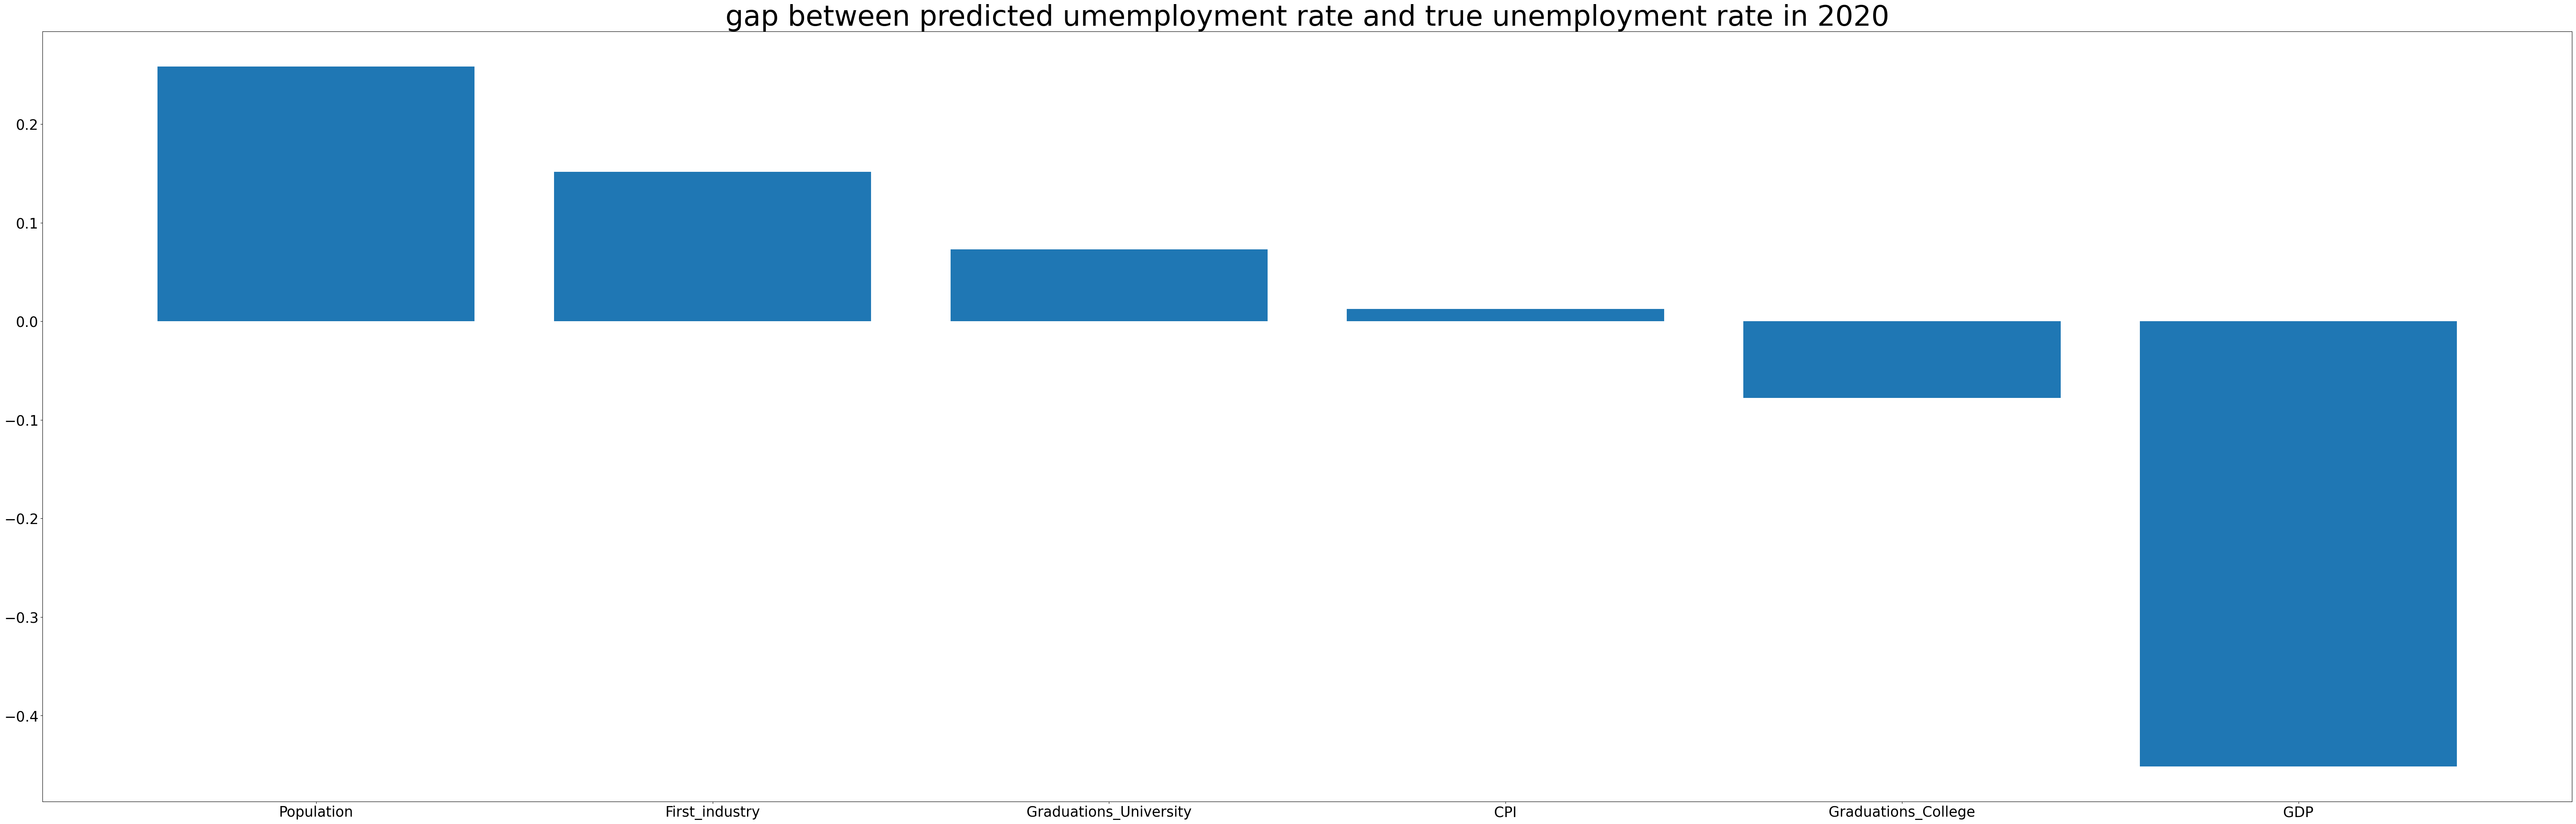

In [35]:
plt.figure(figsize = (80,25), dpi=100)
matplotlib.rcParams.update({'font.size': 25})
plt.bar(x, y)
plt.title("gap between predicted umemployment rate and true unemployment rate in 2020", size = 50)

#### The provinces with Largest and Smallest gap to analyze

In [36]:
#14 province: Henan
abs(df_gap["gap_value"]).max()

2.202944013542778

In [37]:
#24 province: Fujian
abs(df_gap["gap_value"]).min()

0.006982261585973593

In [38]:
df_2020.head()

,Province,GDP,CPI,Population,Graduations_College,Graduations_University,First_industry,unemployment_rate,predicted,gap_value
0,Shanghai,38963.30,101.7,2488.223752,4.6321,10.2253,107.68,3.67,3.927,-0.257
1,Yunnan,24555.72,103.6,4722.224382,13.5539,13.0349,3611.76,3.92,3.205,0.715
2,Neimenggu,17258.04,101.9,2402.800479,6.7816,6.8243,2028.82,3.80,3.475,0.325
3,Beijing,35943.25,101.7,2189.000000,2.7969,13.0796,108.28,2.56,1.402,1.158
4,Jilin,12255.98,102.3,2399.229814,6.3259,12.4354,1553.04,3.42,3.315,0.105


### Section3 Data 2020 with Covid

### Data Proprocessing for 2020 with Covid

In [39]:
path_new='2020data_has_covid.csv'
df_new = pd.read_csv(path_new)

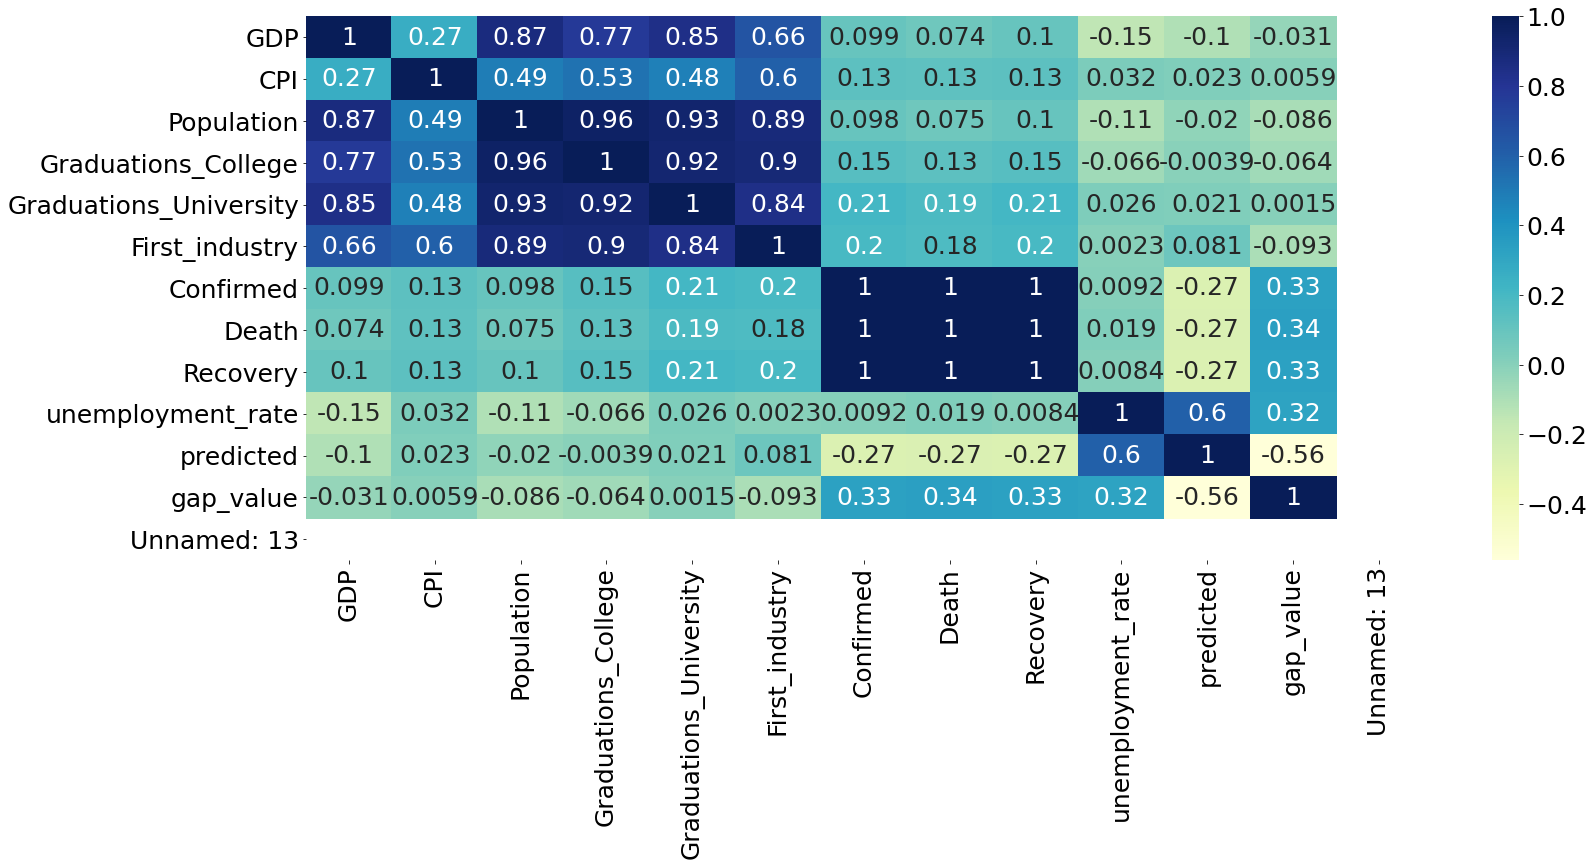

In [40]:
plt.figure(figsize = (25,10))
dataplot = sns.heatmap(df_new.corr(), cmap="YlGnBu", annot=True)

In [41]:
#scale
df_new_scale = df_new.drop(columns = "Province")
scaler = preprocessing.StandardScaler().fit(df_new_scale)

In [42]:
df_covid = scaler.transform(df_new_scale)
#df_covid

In [43]:
df_new

,Province,GDP,CPI,Population,Graduations_College,Graduations_University,First_industry,Confirmed,Death,Recovery,unemployment_rate,predicted,gap_value,Unnamed: 13
0,Shanghai,38963.30,101.7,2488.223752,4.6321,10.2253,107.68,294755,2179,268043,3.67,3.927,-0.257,1.274
1,Yunnan,24555.72,103.6,4722.224382,13.5539,13.0349,3611.76,68144,659,62761,3.92,3.205,0.715,NaN
2,Neimenggu,17258.04,101.9,2402.800479,6.7816,6.8243,2028.82,80055,317,72522,3.80,3.475,0.325,NaN
3,Beijing,35943.25,101.7,2189.000000,2.7969,13.0796,108.28,269663,2920,242242,2.56,1.402,1.158,NaN
4,Jilin,12255.98,102.3,2399.229814,6.3259,12.4354,1553.04,48129,585,45235,3.42,3.315,0.105,NaN
5,Sichuan,48501.64,103.2,8370.698567,23.6548,23.9261,5556.86,223612,1019,206211,3.63,3.772,-0.142,NaN
6,Tianjin,14007.99,102.0,1386.841080,6.0558,8.9243,210.34,75044,1018,69414,3.62,3.508,0.112,NaN
7,Ningxia,3956.34,101.5,720.931970,1.4667,2.0845,338.08,25753,0,24777,3.92,3.772,0.148,NaN
8,Anhui,38061.51,102.7,6104.761696,16.2286,17.1295,3184.95,342035,2033,323551,2.83,2.616,0.214,NaN
9,Shandong,72798.17,102.8,10164.510620,34.5711,28.6303,5364.35,276474,2297,258692,3.10,3.373,-0.273,NaN


In [44]:
df_new.describe()

,GDP,CPI,Population,Graduations_College,Graduations_University,First_industry,Confirmed,Death,Recovery,unemployment_rate,predicted,gap_value,Unnamed: 13
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,3.100000e+01,3.100000e+01,3.100000e+01,31.000000,31.000000,31.00000,1.000
mean,32578.631613,102.383871,4548.787596,13.218348,14.330058,2517.125161,9.229837e+05,4.712052e+04,8.191278e+05,3.288710,3.060710,0.22800,1.274
std,26657.787375,0.467687,3053.956958,9.906276,8.417615,1687.762331,4.116145e+06,2.548452e+05,3.608139e+06,0.579682,0.662606,0.55847,NaN
min,1902.740000,101.500000,365.578698,0.322100,0.585200,107.680000,3.510000e+02,0.000000e+00,3.370000e+02,2.130000,1.402000,-1.09500,1.274
25%,13904.365000,102.150000,2445.512115,6.190850,9.060050,1177.345000,6.736100e+04,3.350000e+02,6.269450e+04,2.810000,2.621000,-0.08050,1.274
50%,25041.430000,102.300000,3954.689775,10.748600,13.330100,2267.730000,1.342470e+05,9.420000e+02,1.235470e+05,3.270000,3.205000,0.21400,1.274
75%,42273.530000,102.650000,6286.530128,18.800700,18.170600,3763.135000,2.948345e+05,2.033500e+03,2.694340e+05,3.650000,3.495500,0.61550,1.274
max,111151.630000,103.600000,12623.613350,38.116700,31.140200,5556.860000,2.308714e+07,1.420242e+06,2.024597e+07,4.610000,4.218000,1.27400,1.274


### OLS Regression Result

In [59]:
#statistics
x = df_new[['Confirmed',"Recovery","Death"]]
y = df_new[['gap_value']]
covid_data = sm.add_constant(x)
model_covid = sm.OLS(y, covid_data).fit()
summary_covid = model_covid.summary()
print(summary_covid)

                            OLS Regression Results                            
Dep. Variable:              gap_value   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     1.813
Date:                Thu, 02 Jun 2022   Prob (F-statistic):              0.169
Time:                        20:25:44   Log-Likelihood:                -22.575
No. Observations:                  31   AIC:                             53.15
Df Residuals:                      27   BIC:                             58.89
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3018      0.157      1.919      0.0

In [51]:
#statistics
x = df_new[['Confirmed', "Death", "Recovery"]]
y = df_new[['unemployment_rate']]
covid_data = sm.add_constant(x)
model_covid = sm.OLS(y, covid_data).fit()
summary_covid = model_covid.summary()
print(summary_covid)

                            OLS Regression Results                            
Dep. Variable:      unemployment_rate   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.9243
Date:                Thu, 02 Jun 2022   Prob (F-statistic):              0.442
Time:                        19:37:28   Log-Likelihood:                -25.060
No. Observations:                  31   AIC:                             58.12
Df Residuals:                      27   BIC:                             63.86
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4962      0.170     20.515      0.0

In [187]:
X_reg_covid = df_new[["GDP", "CPI", "Population", "Graduations_College", "Graduations_University", "First_industry", "Confirmed", "Death", "Recovery"]]
y_reg_covid = df_new[["unemployment_rate"]]

In [188]:
Linear_reg = LinearRegression()
model_covid = Linear_reg.fit(X_reg_covid, y_reg_covid)


print(Linear_reg.score(X_reg_covid, y_reg_covid))

0.2522072418779028


In [189]:
model_covid.coef_

array([[-3.59463728e-06, -1.35512336e-01, -8.45786813e-05,
        -2.78678403e-02,  7.87089127e-02,  8.47577976e-05,
        -1.14526810e-05,  3.96744016e-05,  1.02433097e-05]])

In [190]:
model_covid.order

AttributeError: 'LinearRegression' object has no attribute 'order'

In [193]:
coef_order1 = model_covid.coef_[0].argsort()[::-1] #get the order of indices of reg.coef_
x, y = [], []
for i in zip(model_covid.coef_[0][coef_order1], model_covid.feature_names_in_[coef_order1]):
    y.append(i[0])
    x.append(i[1])
    print('{:.3f}'.format(i[0]), i[1])

0.079 Graduations_University
0.000 First_industry
0.000 Death
0.000 Recovery
-0.000 GDP
-0.000 Confirmed
-0.000 Population
-0.028 Graduations_College
-0.136 CPI


Text(0.5, 1.0, 'Feature importance of unemployment rate in 2020')

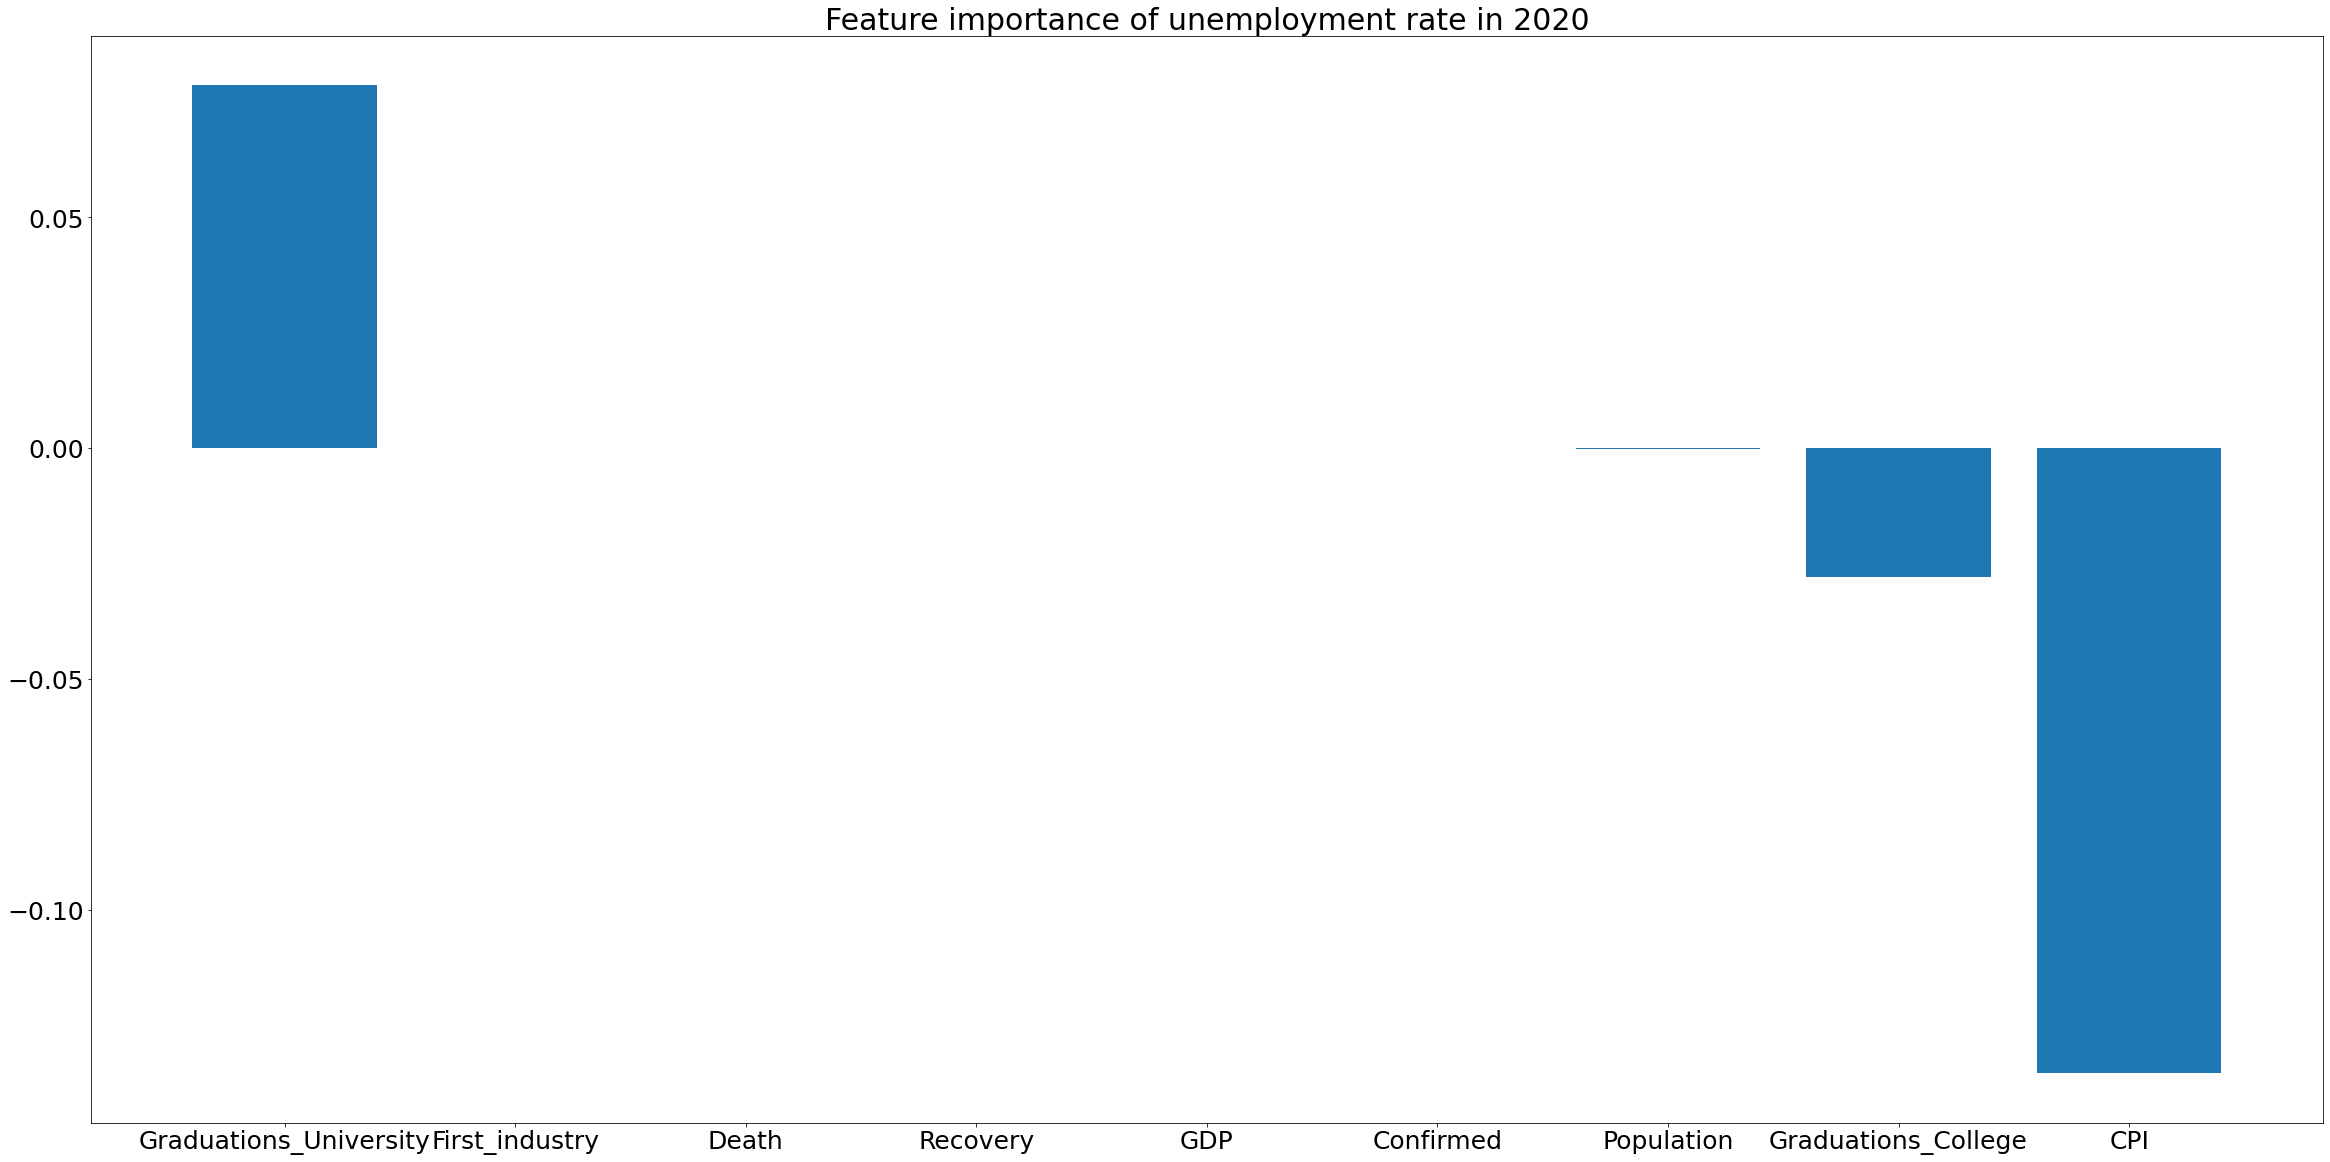

In [101]:
plt.figure(figsize = (40,20))
matplotlib.rcParams.update({'font.size': 25})
plt.bar(x, y)
plt.title("Feature importance of unemployment rate in 2020", size = 30)

##### Covid19 effect in provinces